# Software Coaching for Python
# Week 6: Project Presentation

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/Software_Coaching_Fall_2021"
my_folder = "KHU"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"

Mounted at /content/gdrive


In [ ]:
import requests
from bs4 import BeautifulSoup

## Executive Summary

### Name

엄계현

### Target Web Site

:theHill.com: https://thehill.com/policy/technology


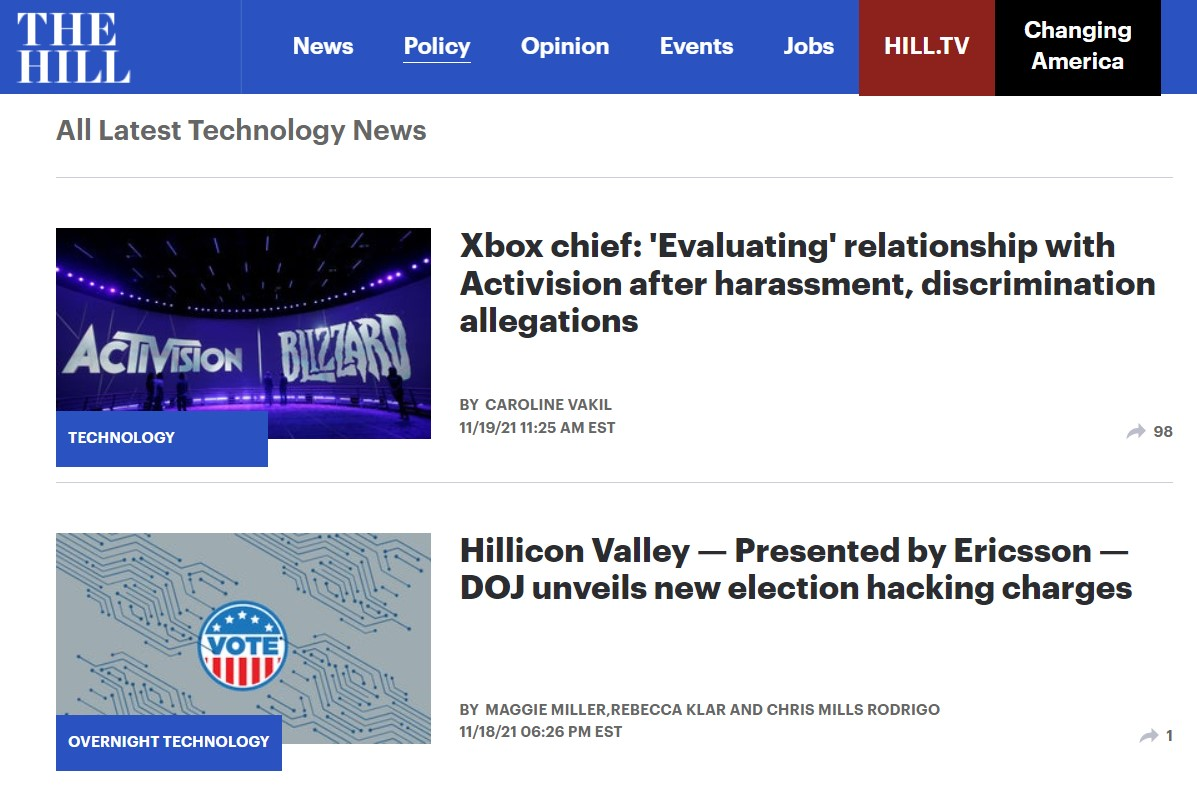

In [ ]:
from IPython.display import Image
Image(f"{outcome_folder}/Capture.jpg")

### Reasons Why I Chose the Web Site

이번 프로젝트를 통해서 기술과 관련된 키워드를 뽑아내면 유의미할 것이라는 생각이 들었음. 그 중에서 theHill.com은 "TECH"라는 카테고리가 분류되어있었으면, 다른 정치 및 스포츠 관련 기사여도 기술과 조금이라도 관련이 있으면 "TECH" 카테고리에 들어와 있어서 훨씬 더 광범위한 데이터 분석이 가능할 것으로 예상해서 선정.   

### Total Number of Web Articles Collected

12819 건

### Data Time Range

2020-09-11 - 2021-11-04 (약 14개월)

### Key Findings and Lessons

- FiveThirtyEight.com 사이트의 특성상 예상한 바와 같이 정치와 스포츠 분야에 집중된 관심사들이 다양한 텍스트 분석에서 고르게 반영되었음.  
- 특히 미 대선이라는 중대한 기간 동안 가장 많은 글들이 집중적으로 게재되었음을 확인함.  

### Major Challenges


- 미국의 정치와 스포츠에 대한 상당한 도메인 지식을 갖추고 있어야만 정확한 분석과 해석이 가능했음.
- 키워드 분석에 있어 stopword로 사전 정의하기 애매한 단어들이 다수 등장하여 유의미한 키워드들을 밝혀내는 작업을 어렵게 만들었음.  

### Future Work



- 키워드 분석에서 어떤 단어의 단수 형태와 복수 형태가 서로 다른 단어로 구별되는 문제가 있었음. 수업 시간에 배운 word stemming 기술을 적용해볼 여지가 있음. 
- 하나의 단어가 여러 가지 의미를 가질 수 있기 때문에, 키워드 랭킹에서 등장한 의미가 불명확한 단어들의 정확한 의미를 밝혀내면 더 정확한 분석을 할 수 있으리라 생각됨. (가령 win이나 lose가 경기 결과와 관련된 표현인지 아니면 선거 결과와 관련된 표현인지)
- Time series 분석에서 peak week 분석 뿐만 아니라 시간에 따른 키워드 랭킹의 변화를 추적해봄으로써 관심사가 어떻게 변하는지를 살펴보는 것도 의미가 있으리라 생각됨.
- 데이터의 time range를 현재 14개월에서 수 년으로 확장해보는 것도 의미 있는 시도일 것임. 
- 정치와 스포츠 분야 이외에도 데이터 및 통계 분석이 적극적으로 활용될 수 있는 영역이 무엇일지 고민. 

## Installing Necessary Packages

In [ ]:
! pip install --user nltk scikit-learn pyldavis textblob

     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 58.0 MB/s 
     |████████████████████████████████| 15.7 MB 61 kB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=6b3ad6f24bf177e941404ca866289e86f001a39edcf9080c351d378cf5e3701b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.

## Loading Data

In [ ]:
urls = ["https://thehill.com/policy/technology"] #urls라는 변수에다가 우리가 사용할 url 추가

for i in range(1, 801):     # The range(1, 801) generates a list of integers from 1 to 800.
    url = f"https://thehill.com/policy/technology?page={i}" 
    urls.append(url)
    
urls

['https://thehill.com/policy/technology',
 'https://thehill.com/policy/technology?page=1',
 'https://thehill.com/policy/technology?page=2',
 'https://thehill.com/policy/technology?page=3',
 'https://thehill.com/policy/technology?page=4',
 'https://thehill.com/policy/technology?page=5',
 'https://thehill.com/policy/technology?page=6',
 'https://thehill.com/policy/technology?page=7',
 'https://thehill.com/policy/technology?page=8',
 'https://thehill.com/policy/technology?page=9',
 'https://thehill.com/policy/technology?page=10',
 'https://thehill.com/policy/technology?page=11',
 'https://thehill.com/policy/technology?page=12',
 'https://thehill.com/policy/technology?page=13',
 'https://thehill.com/policy/technology?page=14',
 'https://thehill.com/policy/technology?page=15',
 'https://thehill.com/policy/technology?page=16',
 'https://thehill.com/policy/technology?page=17',
 'https://thehill.com/policy/technology?page=18',
 'https://thehill.com/policy/technology?page=19',
 'https://thehill

In [ ]:
url = "https://thehill.com/policy/technology/580687-facebook-whistleblower-worried-about-metaverse-safety-concerns"
r = requests.get(url)

In [ ]:
url[len("https://thehill.com/policy/technology/"):-1]

In [ ]:
fileName = url[len("https://thehill.com/policy/technology/"):-1] +"/html"
fileName

'580687-facebook-whistleblower-worried-about-metaverse-safety-concern/html'

In [ ]:
import os

#if not os.path.isdir(f"{outcome_folder}/MyProject"):
  #os.mkdir(f"{outcome_folder}/MyProject")

In [ ]:
import time

In [ ]:
#node__title node-title

i=0
for url in urls:
    print(url)
    
    ####################################################
    # Get the content of a page
    ####################################################
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    
    ####################################################
    # Get the list of articles
    ####################################################
    h2_list = soup.find_all("h2", {"class": "node__title node-title"})
    for h2 in h2_list:
        a = h2.find("a") # Find the anchor tag

        # Extract the title & URL of an article
        title = a.text
        article_url = "https://thehill.com"+a["href"]

        r2 = requests.get(article_url)

        # Fetch the content and save it as an HTML file
        print("- " + article_url + ": processing...")
        file_name = f'{i}.html'
        i = i+1
     
        with open(f"{outcome_folder}/MyProject/{file_name}", "w+b") as fw:
            fw.write(r2.content)
        print("- " + file_name + ": saved.")
        # Sleep for a second to not overload the web site
        ####################################################
        time.sleep(1)      

    print() 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
- 10466.html: saved.

https://thehill.com/policy/technology?page=654
- https://thehill.com/policy/technology/277183-zuckerberg-facebook-increasingly-in-political-spotlight: processing...
- 10467.html: saved.
- https://thehill.com/policy/technology/277219-uber-reaches-settlement-in-major-driver-status-cases: processing...
- 10468.html: saved.
- https://thehill.com/policy/technology/overnights/277197-overnight-tech-spotlight-turned-on-rosenworcel-nomination: processing...
- 10469.html: saved.
- https://thehill.com/policy/national-security/277164-fbi-paid-more-than-13m-to-hack-terrorists-iphone: processing...
- 10470.html: saved.
- https://thehill.com/policy/technology/277158-internet-provider-trade-groups-ask-for-more-time-for-privacy-comments: processing...
- 10471.html: saved.
- https://thehill.com/policy/technology/277119-taskrabbit-signs-on-to-congressional-black-caucus-plan-to-boost-diversity: processing...
- 10472.html: saved.
- https://thehill.c

In [ ]:
#os.listdir(f"{outcome_folder}/MyProject")
len(os.listdir(f"{outcome_folder}/MyProject"))

12819

In [71]:
htmlFiles = [file for file in os.listdir(f"{outcome_folder}/MyProject")]
#len(htmlFiles)
for file_name in htmlFiles:
    #print(file_name)
    with open(f"{outcome_folder}/MyProject/{file_name}", "r+b") as fr:
      soup = BeautifulSoup(fr.read(),"html.parser")
      if soup.find("div",{"class":"field-item even"})!= None:
        Body = soup.find("div",{"property":"content:encoded"}).get_text().replace("\n","").replace("\t","")
        #Body = tempBody.find("div",{"class: field-item even"}).get_text().replace("\n","").replace("\t","")
      else:
        Body = ""
      print(Body)

Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday that a fiber-optic line had been cut in Alameda County, Calif.ADVERTISEMENT<!--//--><![CDATA[// ><!--googletag.cmd.push(function() {googletag.display("dfp-ad-mosad_1");});//--><!]]>“These cuts affected multiple companies causing outages in some of the Bay area and stretched up into the Sacramento area,” said FBI Special Agent Greg Wuthrich in an email.Tuesday's incident in Alameda County marks the 11th time in the last year that cables have been deliberately cut in the state, authorities said. Wuthrich said that the incidents had similarities but declined to elaborate because the investigation is ongoing.The first took place in Berkeley, Calif. in July 2014, according to information released by the FBI earlier this month.Wuthrich said that some of the lines were shared by more than one company, causing multiple outages.Authorities have asked the 

KeyboardInterrupt: ignored

In [72]:
with open(f"{outcome_folder}/theHill.csv","w") as fw:
  fw.write("Title\tAuthor\tDate\tBody\n")

  for file_name in htmlFiles:
    with open(f"{outcome_folder}/MyProject/{file_name}","r+b") as fr:
      print(file_name)
      soup = BeautifulSoup(fr.read(),"html.parser")

      if soup.find("h1", {"id": "page-title"}) != None:
        Title = soup.find("h1", {"id": "page-title"}).text.strip().replace("\t","").replace("\n","")
      else : Title = "Unknown"

      if soup.find("span",{"class":"submitted-by"}) != None:
        tempAuthor = soup.find("span",{"class":"submitted-by"}).text.replace("\t","").replace("EDT","").replace("\n","").split('-')
        if len(tempAuthor) == 2:
          Author = tempAuthor[0]
        else:
          Author = "Unknown"
      else :
        Author = "Unknown"

      if soup.find("span",{"class":"submitted-date"})!= None:
        Date = soup.find("span",{"class":"submitted-date"}).text.replace("\t","").replace("EDT","")
      else:
        Date = "Unknown"

      if soup.find("div",{"property":"content:encoded"})!= None:
        Body = soup.find("div",{"property":"content:encoded"}).get_text().replace("\n","").replace("\t","")
      else:
        Body = ""

      fw.write(f"{Title}\t{Author}\t{Date}\t{Body}\n")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5638.html
5639.html
5640.html
5641.html
5642.html
5643.html
5644.html
5645.html
5646.html
5647.html
5648.html
5649.html
5650.html
5651.html
5652.html
5653.html
5654.html
5655.html
5656.html
5657.html
5658.html
5659.html
5660.html
5661.html
5662.html
5663.html
5664.html
5665.html
5666.html
5667.html
5668.html
5669.html
5670.html
5671.html
5672.html
5673.html
5674.html
5675.html
5676.html
5677.html
5678.html
5679.html
5680.html
5681.html
5682.html
5683.html
5684.html
5685.html
5686.html
5687.html
5688.html
5689.html
5690.html
5691.html
5692.html
5693.html
5694.html
5695.html
5696.html
5697.html
5698.html
5699.html
5700.html
5701.html
5702.html
5703.html
5704.html
5705.html
5706.html
5707.html
5708.html
5709.html
5710.html
5711.html
5712.html
5713.html
5714.html
5715.html
5716.html
5717.html
5718.html
5719.html
5720.html
5721.html
5722.html
5723.html
5724.html
5725.html
5726.html
5727.html
5728.html
5729.html
5730.html
5731.html
5732.html
5733.html
5734

In [ ]:
 ! pip install --user pandas xlsxwriter

     |████████████████████████████████| 149 kB 5.2 MB/s 


In [73]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)
df = pd.read_csv(f"{outcome_folder}/theHill.csv", sep="\t") #read_csv 함수를 이용해서 csv파일을 읽어오기 // sep은 구분(separator)
df = df.dropna(subset=["Body"],axis=0)
df = df
df.Body = df.Body.astype(str)
df 

,Title,Author,Date,Body
0,FBI investigating 11 attacks on Calif. fiber-optic lines,By David McCabe,07/01/15 03:19 PM,Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday that...
1,Sprint backtracks on data speeds after backlash,By David McCabe,07/01/15 12:22 PM,Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced a...
2,China tightens Internet control with national security law,By Cory Bennett,07/01/15 09:45 AM,China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s information...
3,Outgoing Twitter CEO: 'Regulation is a threat to free speech',By David McCabe,07/01/15 09:39 AM,Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I think...
4,Apple loses appeal of $450M antitrust case,By David McCabe,06/30/15 06:07 PM,Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related ...
...,...,...,...,...
12814,Bipartisan attorneys general urge Facebook to scrap planned Instagram for kids,By Rebecca Klar,05/10/21 10:55 AM,"A bipartisan group of 45 attorneys general are urging Facebook to abandon plans to launch an Instagram for kids platform, citing concerns about ch..."
12815,Amazon blocks 10B listings in crackdown on counterfeits,By Rebecca Klar,05/10/21 10:12 AM,"Amazon blocked more than 10 billion listings as part of its push toward driving out counterfeit products, the e-commerce giant said Monday. Amazon..."
12816,"Hillicon Valley: US, UK authorities say Russian hackers exploited Microsoft vulnerabilities | Lawmakers push for more cyber funds in annual approp...","By Maggie Miller,Chris Mills Rodrigo and Rebecca Klar",05/07/21 06:03 PM,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."
12817,Google child care workers petition for transportation stipend,By Chris Mills Rodrigo,05/07/21 04:23 PM,A group of Google workers who provide child care services and education for other employees' kids are circulating a petition urging the Silicon Va...


In [65]:
df[3263:]

,Title,Author,Date,Body
3292,Overnight Tech: Uber CEO quits Trump advisory team | Snapchat parent files for IPO | FCC unveils plan to improve transparency,By Harper Neidig and Ali Breland,02/02/17 06:36 PM EST,Federal Communications Commission Chairman Ajit Pai on Thursday unveiled a plan to increase transparency at the FCC by making regulatory proposals...
3293,Snapchat parent company files for IPO,By Ali Breland,02/02/17 05:16 PM EST,"Snap Inc., the parent company of mobile app Snapchat, officially filed for an initial public offering (IPO) on Thursday afternoon.The highly antic..."
3294,Uber CEO quitting Trump's advisory council,By Melanie Zanona,02/02/17 04:42 PM EST,_informq.push(['embed']);
3295,Lawmakers push FCC chief to boost rural broadband,By Ali Breland,02/02/17 04:08 PM EST,A bipartisan coalition of 28 lawmakers is urging Federal Communications Commission Chairman Ajit Pai to make providing access to mobile broadband ...
3296,Drivers urge Uber CEO to leave Trump advisory council after travel ban,By Melanie Zanona,02/02/17 01:49 PM EST,Drivers in New York City are urging Uber CEO Travis Kalanick to step down from President Trump’s advisory council following the administration’s n...
...,...,...,...,...
12813,Bipartisan attorneys general urge Facebook to scrap planned Instagram for kids,By Rebecca Klar,05/10/21 10:55 AM,"A bipartisan group of 45 attorneys general are urging Facebook to abandon plans to launch an Instagram for kids platform, citing concerns about ch..."
12814,Amazon blocks 10B listings in crackdown on counterfeits,By Rebecca Klar,05/10/21 10:12 AM,"Amazon blocked more than 10 billion listings as part of its push toward driving out counterfeit products, the e-commerce giant said Monday. Amazon..."
12815,"Hillicon Valley: US, UK authorities say Russian hackers exploited Microsoft vulnerabilities | Lawmakers push for more cyber funds in annual approp...","By Maggie Miller,Chris Mills Rodrigo and Rebecca Klar",05/07/21 06:03 PM,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."
12816,Google child care workers petition for transportation stipend,By Chris Mills Rodrigo,05/07/21 04:23 PM,A group of Google workers who provide child care services and education for other employees' kids are circulating a petition urging the Silicon Va...


In [ ]:
#df[df.isnull().any(axis=1)] #null 값 확인 부분
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12818 entries, 0 to 12817
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   12818 non-null  object
 1   Author  12818 non-null  object
 2   Date    12818 non-null  object
 3   Body    12818 non-null  object
dtypes: object(4)
memory usage: 400.7+ KB


## Popular Keywords Ranking

In [ ]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])
from nltk.util import ngrams
from textblob import TextBlob

df["sentences"] = df.Body.apply(lambda x: nltk.sent_tokenize(x))
df["num_sentences"] = df.sentences.apply(lambda x: len(x))
df["words"] = df.Body.apply(lambda x: nltk.word_tokenize(x))
df["num_words"] = df.words.apply(lambda x: len(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))
df["nouns"] = df.tagged_words.apply(lambda x: [word for word, tag in x if tag.startswith("NN")])
df["polarity"] = df.Body.apply(lambda x: TextBlob(x).sentiment.polarity)
df["subjectivity"] = df.Body.apply(lambda x: TextBlob(x).sentiment.subjectivity)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
foundError = df.loc[df["Date"].str.contains("02/02/17 04:42 PM")]
foundError

,Title,Author,Date,Body
3294,Uber CEO quitting Trump's advisory council,By Melanie Zanona,02/02/17 04:42 PM EST,_informq.push(['embed']);


In [ ]:
df

,Title,Author,Date,Body,sentences,num_sentences,words,num_words,tagged_words,nouns,polarity,subjectivity
0,FBI investigating 11 attacks on Calif. fiber-optic lines,By David McCabe,07/01/15 03:19 PM,Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday that...,[Federal authorities are investigating eleven incidents of fiber-optic lines being cut in the Bay Area of California.The FBI said on Wednesday tha...,4,"[Federal, authorities, are, investigating, eleven, incidents, of, fiber-optic, lines, being, cut, in, the, Bay, Area, of, California.The, FBI, sai...",255,"[(Federal, JJ), (authorities, NNS), (are, VBP), (investigating, VBG), (eleven, JJ), (incidents, NNS), (of, IN), (fiber-optic, JJ), (lines, NNS), (...","[authorities, incidents, lines, Bay, Area, California.The, FBI, Wednesday, line, Alameda, County, Calif.ADVERTISEMENT, <, <, [, CDATA, [, //, >, <...",0.150476,0.359206
1,Sprint backtracks on data speeds after backlash,By David McCabe,07/01/15 12:22 PM,Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced a...,[Sprint said late Tuesday night that it would stop limiting data available to unlimited plan users after a public backlash.The company introduced ...,8,"[Sprint, said, late, Tuesday, night, that, it, would, stop, limiting, data, available, to, unlimited, plan, users, after, a, public, backlash.The,...",406,"[(Sprint, NNP), (said, VBD), (late, JJ), (Tuesday, NNP), (night, NN), (that, IN), (it, PRP), (would, MD), (stop, VB), (limiting, VBG), (data, NNS)...","[Sprint, Tuesday, night, data, plan, users, backlash.The, company, talk, data, text, plan, week, data, speeds, consumers, video.ADVERTISEMENT, <, ...",0.186695,0.440566
2,China tightens Internet control with national security law,By Cory Bennett,07/01/15 09:45 AM,China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s information...,[China has unanimously approved a wide-ranging national security law that grants authorities vague jurisdiction to secure the country’s informatio...,5,"[China, has, unanimously, approved, a, wide-ranging, national, security, law, that, grants, authorities, vague, jurisdiction, to, secure, the, cou...",678,"[(China, NNP), (has, VBZ), (unanimously, RB), (approved, VBN), (a, DT), (wide-ranging, JJ), (national, JJ), (security, NN), (law, NN), (that, WDT)...","[China, security, law, authorities, jurisdiction, country, ’, information, technology.The, move, business, community, China, technology, firms, ri...",0.066914,0.393396
3,Outgoing Twitter CEO: 'Regulation is a threat to free speech',By David McCabe,07/01/15 09:39 AM,Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I think...,[Twitter's outgoing CEO said during an interview published Tuesday that government rules endanger free expression.“I will say directly that I thin...,6,"[Twitter, 's, outgoing, CEO, said, during, an, interview, published, Tuesday, that, government, rules, endanger, free, expression., “, I, will, sa...",298,"[(Twitter, NNP), ('s, POS), (outgoing, VBG), (CEO, NNP), (said, VBD), (during, IN), (an, DT), (interview, NN), (published, VBD), (Tuesday, NNP), (...","[Twitter, CEO, interview, Tuesday, government, rules, expression., “, regulation, threat, speech, ”, Dick, Costolo, Guardian, Twitter, <, <, [, CD...",0.099506,0.461823
4,Apple loses appeal of $450M antitrust case,By David McCabe,06/30/15 06:07 PM,Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related ...,[Apple said it is focused on the “next steps” after a federal appeals court let a judgement against the company stand in an antitrust suit related...,6,"[Apple, said, it, is, f

In [ ]:
from collections import Counter

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)     # Be aware of the indentation!
        
    return counter


In [ ]:
from nltk.corpus import stopwords
global_stopwords = nltk.corpus.stopwords.words("english") 

import string
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '”', '“',  '—', '…', "could", "might", "would"] + ["<",">","CDATA","[","]","//","''","``","--"] +\
                  ["are","of","it","to","that","in","the","a","I","an","for","who","'s","said","for","A","on","has","also"]+["dfp-ad-mosad_1","make","dfp-ad-incontent_desk_1"]+\
                  ["month","tuesday",".jan","jan.","monday","two","year","wednesday", "days", "people"]

### Overall Popular Keywords

In [ ]:
counter_all = get_counter(df, global_stopwords+local_stopwords)
counter_all.most_common(50)

[('googletag.display', 12370),
 ('function', 12370),
 ('googletag.cmd.push', 8510),
 ('cdata', 8510),
 ('new', 7609),
 ('company', 7257),
 ('last', 6032),
 ('companies', 5972),
 ('federal', 5753),
 ('people', 4973),
 ('one', 4965),
 ('biden', 4931),
 ('president', 4922),
 ('access', 4890),
 ('house', 4879),
 ('facebook', 4848),
 ('ceo', 4823),
 ('according', 4785),
 ('including', 4731),
 ('like', 4729),
 ('u.s.', 4647),
 ('tech', 4596),
 ('statement', 4506),
 ('told', 4449),
 ('first', 4440),
 ('government', 4419),
 ('action', 4372),
 ('time', 4366),
 ('hill', 4328),
 ('information', 4287),
 ('week', 4222),
 ('law', 4205),
 ('trump', 4200),
 ('security', 4101),
 ('presented', 4037),
 ('public', 4022),
 ('data', 3997),
 ('media', 3997),
 ('back', 3968),
 ('commission', 3955),
 ('campaign', 3942),
 ('technology', 3922),
 ('use', 3922),
 ('social', 3910),
 ('take', 3880),
 ('report', 3877),
 ('says', 3862),
 ('users', 3755),
 ('group', 3752),
 ('6', 3695)]

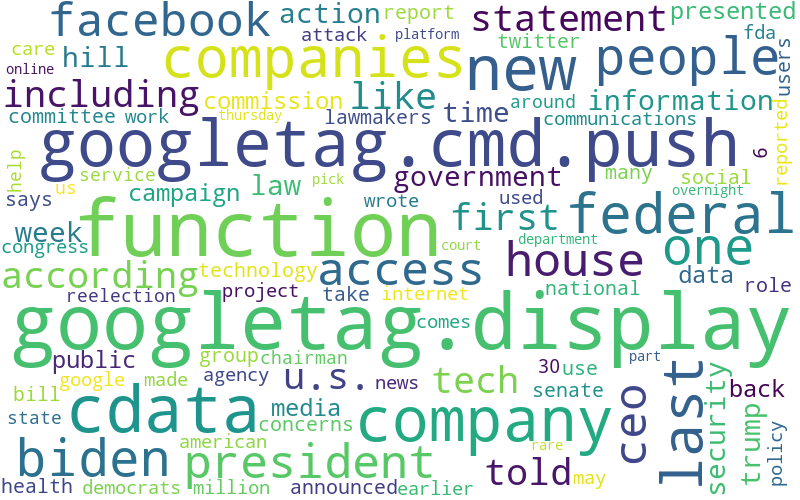

In [ ]:
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(counter_all, f"{outcome_folder}/theHill_all.png", 100)

### Popular Nouns Representing Hot Topics

In [ ]:
counter_nouns = get_counter(df, global_stopwords+local_stopwords, "NN")
counter_nouns.most_common(50)

[('function', 12370),
 ('googletag.display', 12370),
 ('googletag.cmd.push', 8510),
 ('cdata', 8510),
 ('company', 7257),
 ('companies', 5972),
 ('biden', 4930),
 ('president', 4922),
 ('access', 4890),
 ('house', 4879),
 ('facebook', 4845),
 ('ceo', 4823),
 ('u.s.', 4647),
 ('statement', 4506),
 ('government', 4418),
 ('action', 4372),
 ('time', 4366),
 ('hill', 4327),
 ('information', 4287),
 ('week', 4209),
 ('law', 4205),
 ('trump', 4189),
 ('security', 4101),
 ('media', 3997),
 ('data', 3982),
 ('commission', 3955),
 ('campaign', 3942),
 ('tech', 3928),
 ('technology', 3922),
 ('group', 3752),
 ('users', 3749),
 ('twitter', 3668),
 ('committee', 3661),
 ('bill', 3660),
 ('senate', 3559),
 ('health', 3553),
 ('concerns', 3550),
 ('federal', 3535),
 ('role', 3521),
 ('lawmakers', 3509),
 ('democrats', 3419),
 ('congress', 3376),
 ('report', 3362),
 ('project', 3340),
 ('communications', 3283),
 ('google', 3206),
 ('new', 3186),
 ('news', 3177),
 ('agency', 3169),
 ('attack', 3169)]

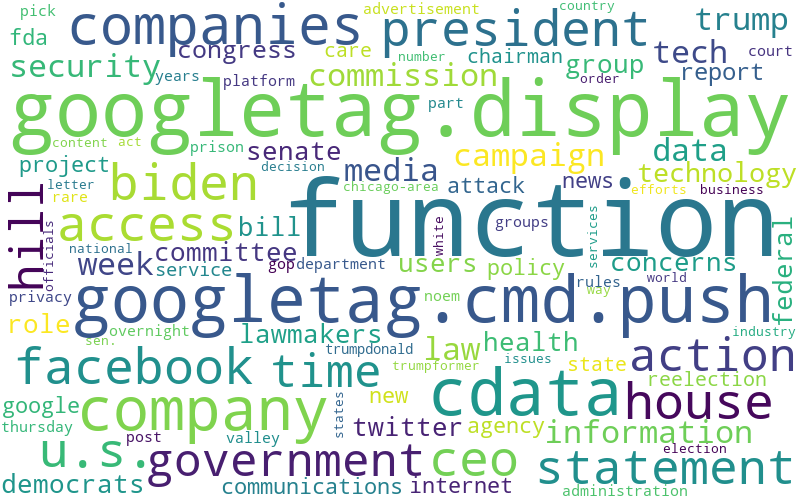

In [ ]:
draw_wordcloud(counter_nouns, f"{outcome_folder}/theHill_nouns.png", 100)

In [ ]:
mask = df.Title.str.contains("facebook", case=False)
df[mask][["Date", "Title", "Body"]]

,Date,Title,Body
41,06/23/15 11:41 AM,"European privacy probes could cost Facebook, report finds","Probes into Facebook’s data practices in Europe may cost the social network financially, a research firm said Monday.Regulators around Europe are ..."
61,06/18/15 09:56 AM,Facebook CEO donates $5M to scholarships for young immigrants,Facebook CEO Mark Zuckerberg and his wife donated $5 million to a program that provides scholarships to children who were brought to the country i...
71,06/17/15 09:43 AM,Donald Trump comes out on top — on Facebook,If there is one thing Donald TrumpDonald TrumpFormer Chicago-area CEO sentenced to 30 days in prison for role in Jan. 6 attack Noem formally launc...
140,06/04/15 03:56 PM,Facebook privacy exec: Ads are not ‘a tax on users’,A Facebook official tasked with user privacy says that one reason the company isn’t inclined to offer an ad-free version for users who pay is that...
146,06/04/15 09:58 AM,Facebook doesn't rush to friend Chafee,Former Rhode Island Gov. Lincoln Chafee’s (D) presidential campaign announcement on Wednesday attracted less attention from Facebook than any othe...
...,...,...,...
12795,05/12/21 06:33 PM,"Facebook moderator describes 'awful' content, told to try 'karaoke or painting'",A Facebook content moderator called on Irish lawmakers to regulate the social media giant’s approach to policing its platform during a hearing Wed...
12803,05/11/21 05:48 PM,Hillicon Valley: Feds eye more oversight of pipelines after Colonial attack | White House monitoring fuel shortages | Democrats urge Facebook to r...,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."
12807,05/11/21 12:08 PM,Democrats urge Facebook to reverse WhatsApp privacy update,Members of the Congressional Hispanic Caucus on Tuesday urged Facebook to reverse plans for a required update to its messaging platform subsidiary...
12810,05/10/21 06:14 PM,Hillicon Valley: Colonial Pipeline attack underscores US energy's vulnerabilities | Biden leading 'whole-of-government' response to hack | Attorne...,"Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."


In [ ]:
mask = df.Title.str.contains("google", case=False)
df[mask][["Date", "Title", "Body"]]

,Date,Title,Body
14,06/29/15 12:32 PM,Supreme Court declines Google appeal in copyright case,The Supreme Court declined on Monday to hear Google’s appeal of an ongoing dispute with Oracle over whether certain elements of the Java programmi...
15,06/29/15 11:35 AM,Google adding railway crossings to maps,"Google has agreed to add railroad track crossings to its maps, according to an announcement on Monday from the Obama administration. The Federal R..."
16,06/29/15 10:07 AM,Study: Google hurting users by skewing search results,"Google’s decision to skew its search results in favor of its own services hurts users, a study released Monday claims.The findings are sure to add..."
21,06/26/15 10:40 AM,Google puts new self-driving cars on the road,"Google’s self-driving car prototypes have hit the road.For years, the company has been using modified Lexus SUVs around Mountain View, Calif., to ..."
35,06/24/15 10:09 AM,"Clock still running on Google antitrust charges, official says","Google still has time to respond to antitrust allegations leveled by the European Union’s competition regulators, an official said Wednesday.Margr..."
...,...,...,...
12758,05/20/21 12:45 PM,Google picks NYC for first retail store,"Google announced that it plans to open its first retail store in New York City this summer.""The new Google Store is an important next step in our ..."
12765,05/19/21 04:10 PM,Google rolls out new privacy features,Google announced new privacy features for its Android phone operating system Tuesday that will give users more control over their data but stop sh...
12809,05/11/21 11:03 AM,Google Pay launches international transfers,Google Pay announced Tuesday that it is partnering with remittance companies Wise and Western Union to offer options for users in the U.S. to tran...
12815,05/07/21 06:03 PM,"Hillicon Valley: US, UK authorities say Russian hackers exploited Microsoft vulnerabilities | Lawmakers push for more cyber funds in annual approp...","Welcome to Hillicon Valley, The Hill's newsletter detailing all you need to know about the tech and cyber news from Capitol Hill to Silicon Valley..."


### Popular Adjectives Representing Emotional Aspects

In [ ]:
counter_adjs = get_counter(df, global_stopwords+local_stopwords, "JJ")
counter_adjs.most_common(50)

[('new', 6375),
 ('last', 6031),
 ('federal', 3770),
 ('social', 3653),
 ('many', 3392),
 ('public', 3289),
 ('first', 3037),
 ('unveils', 2800),
 ('top', 2540),
 ('former', 2507),
 ('democratic', 2452),
 ('recent', 2326),
 ('major', 2303),
 ('next', 2285),
 ('political', 2236),
 ('tech', 2169),
 ('american', 2158),
 ('national', 2007),
 ('several', 2005),
 ('potential', 1959),
 ('able', 1923),
 ('foreign', 1843),
 ('digital', 1750),
 ('critical', 1744),
 ('important', 1727),
 ('online', 1716),
 ('similar', 1709),
 ('legal', 1700),
 ('presidential', 1698),
 ('private', 1595),
 ('different', 1577),
 ('general', 1568),
 ('personal', 1532),
 ('global', 1502),
 ('congressional', 1490),
 ('past', 1490),
 ('sure', 1480),
 ('clear', 1479),
 ('corporate', 1420),
 ('latest', 1415),
 ('bipartisan', 1415),
 ('good', 1401),
 ('open', 1392),
 ('chief', 1351),
 ('free', 1349),
 ('certain', 1327),
 ('significant', 1292),
 ('least', 1270),
 ('net', 1255),
 ('big', 1255)]

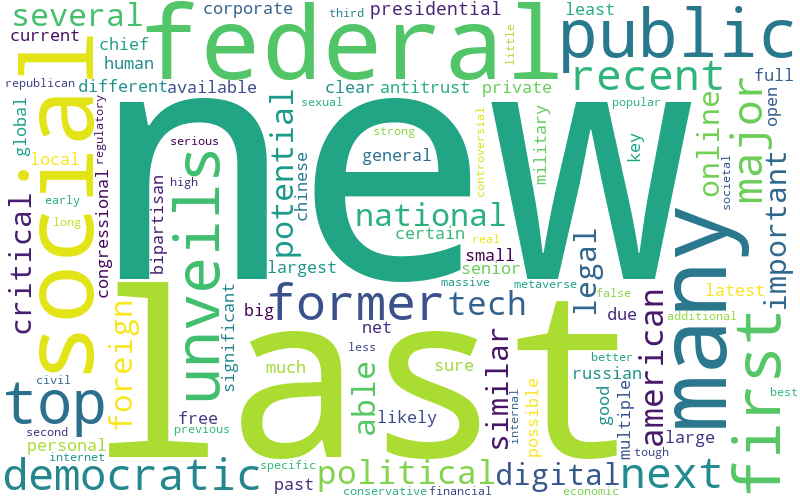

In [ ]:
draw_wordcloud(counter_adjs, f"{outcome_folder}/theHill_adjs.png", 100)

## Time Series Analysis

In [ ]:
df.Date.min(), df.Date.max()

('01/01/16 09:58 AM EST', 'Unknown')

In [ ]:
df.Date

0        07/01/15 03:19 PM 
1        07/01/15 12:22 PM 
2        07/01/15 09:45 AM 
3        07/01/15 09:39 AM 
4        06/30/15 06:07 PM 
                ...        
12813    05/10/21 10:55 AM 
12814    05/10/21 10:12 AM 
12815    05/07/21 06:03 PM 
12816    05/07/21 04:23 PM 
12817    05/07/21 02:54 PM 
Name: Date, Length: 12657, dtype: object